# PREDICTING HEART DISEASE USING UCI DATASET

# STEP1: Exploratory Data Analysis
**Import necessary libraries** 

In [264]:
import pandas as pd
import numpy as np #not using this yet
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Load CSV Data**

**Columns:**
<br>
- **age:** age in years
<br>
- **sex:**(1 = male; 0 = female)
<br>
- **cp:** chest pain type
<br>
- **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
<br>
- **chol:** serum cholestoral in mg/dl
<br>
- **fbs:** fasting blood sugar>120mg/dl, (1 = true; 0 = false)
<br>
- **restecg:** resting electrocardiographic results
<br>
- **thalach:** maximum heart rate achieved
<br>
- **exang:** exercise induced angina, (1 = yes; 0 = no)
<br>
- **oldpeak:** ST depression induced by exercise relative to rest
<br>
- **slope:** the slope of the peak exercise ST segment
<br>
- **ca:** number of major vessels (0-3) colored by flourosopy
<br>
- **thal:** 3=normal, 6=fixed defect, 7=reversable defect
<br>
- **target:** 1 or 0 (predicted attribute)

In [265]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


As can be seen above, our data is composed of categorical and continuous data. Our categoricl variables are : sex, cp, fbs,restecg, exang,slope, ca, thal. 

# Data Visualisation

**Summary Statistics.**
    Percentiles can help identify the range for most of the data
    Averages and medians can describe central tendency
    Correlations can indicate strong relationships

In [266]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [161]:
Data_cont = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()
Data_cat = data[['sex', 'cp', 'fbs', 'restecg', 'exang','slope', 'ca', 'thal']].copy()

**Correlation Between Continuous Variables in our data.**
Plotting pairwise correlations across our variables can show us if some of our variables explain the same variance.
<br>
<br>- First apply z-transformation to the data (optional, see below * for explanation)
<br>- Across our variables, the maximum correlation is .4 (in negative direction), representing a weak correlation and assures that each of these variables individually carry plenty of unique variance (unique information). If there were two variables with close to perfect correlation (i.e. r=.9), we may consider to reduce dimensionality of these variables by applying PCA, to deal with a possible problem of overfitting.   
-Together with the pairplot, the distribution of our variables are also plotted. In the following section, we wil further investigate these distributions in detail to ckeck for outliers. 

<br> *Note that z-transformation does not change our pairwise scatterplots or the magnitude of our correlations (neither r-values or p-values), only the scale of x-axis and y-axis across variables are more comparible. 

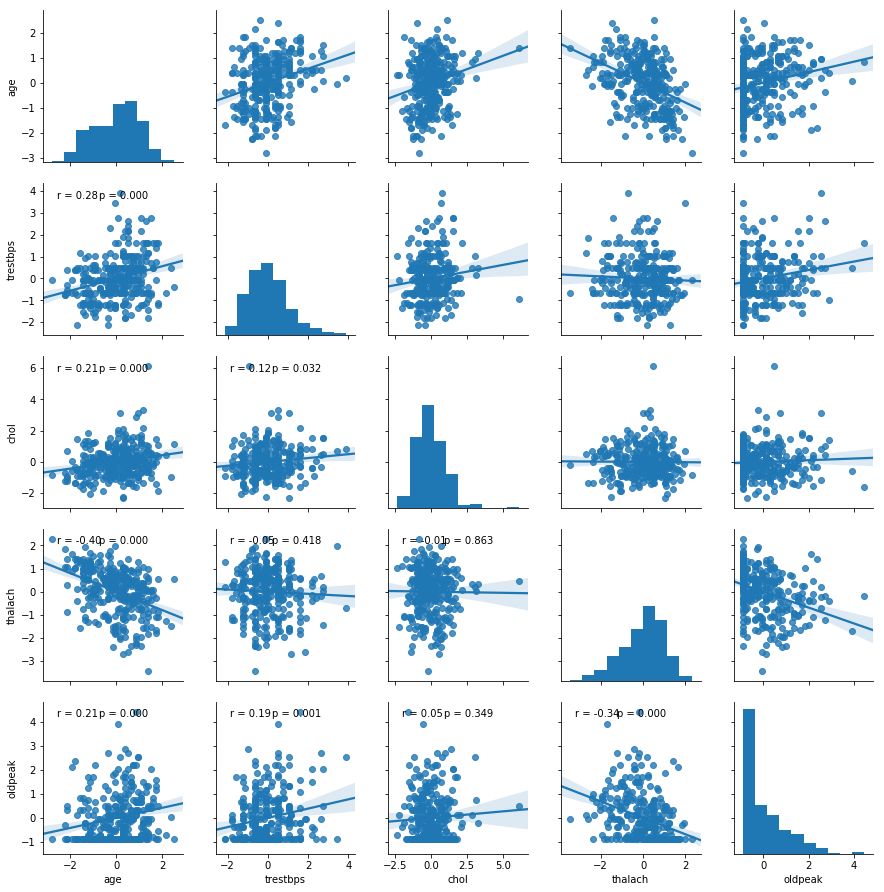

In [153]:
Data_cont_z = (Data_cont - Data_cont.mean()) / Data_cont.std()

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

graph = sns.pairplot(Data_cont_z, kind="reg")
graph.map_lower(corrfunc)
plt.show()

**Check distribution of our continuous data.**
The above pairplot already prints the scatterplots of our data but here we take a closer look at the distribution, check for kurtosis, skewness and binomiality in data.

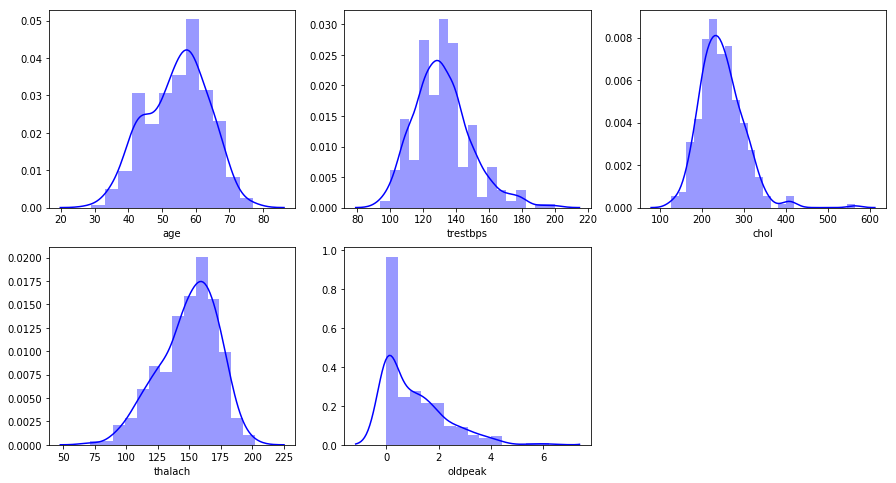

In [157]:
fig, axs = plt.subplots(nrows = 3, ncols=2, figsize = (15,8))

plot_number = 1
for i, x in enumerate(Data_cont):
    ax = plt.subplot(2, 3, plot_number)
    sns.distplot(Data_cont[x], color='blue', ax=ax) 
    plot_number=plot_number+1
plt.show()

Although the first 4 of the variables seem to be slightly skewed, given our sample size, that level of skewness is not too concerning at this point. Moreover not all models require data with normal distribution, for example 
skewness affects the regression intercept and coefficients associated with the model.
Therefore if we need any transformation of our variables depends on which model we decide to apply on our data. 
<br>The only variable with concerning levels of skewness is the 'old peak' variable.

**Visualizing our data by the category that we aim to predict**
<br>Below scaterplots  show the relationship across our variables per the target category that we aim to predict with our model. 
These scatterplots show us overall tendency of each variable having a lower or higher value for specific variables, if there is a systematic clustering in our data. We may use this information later during feature selection, model selection, and updating our algorithms.

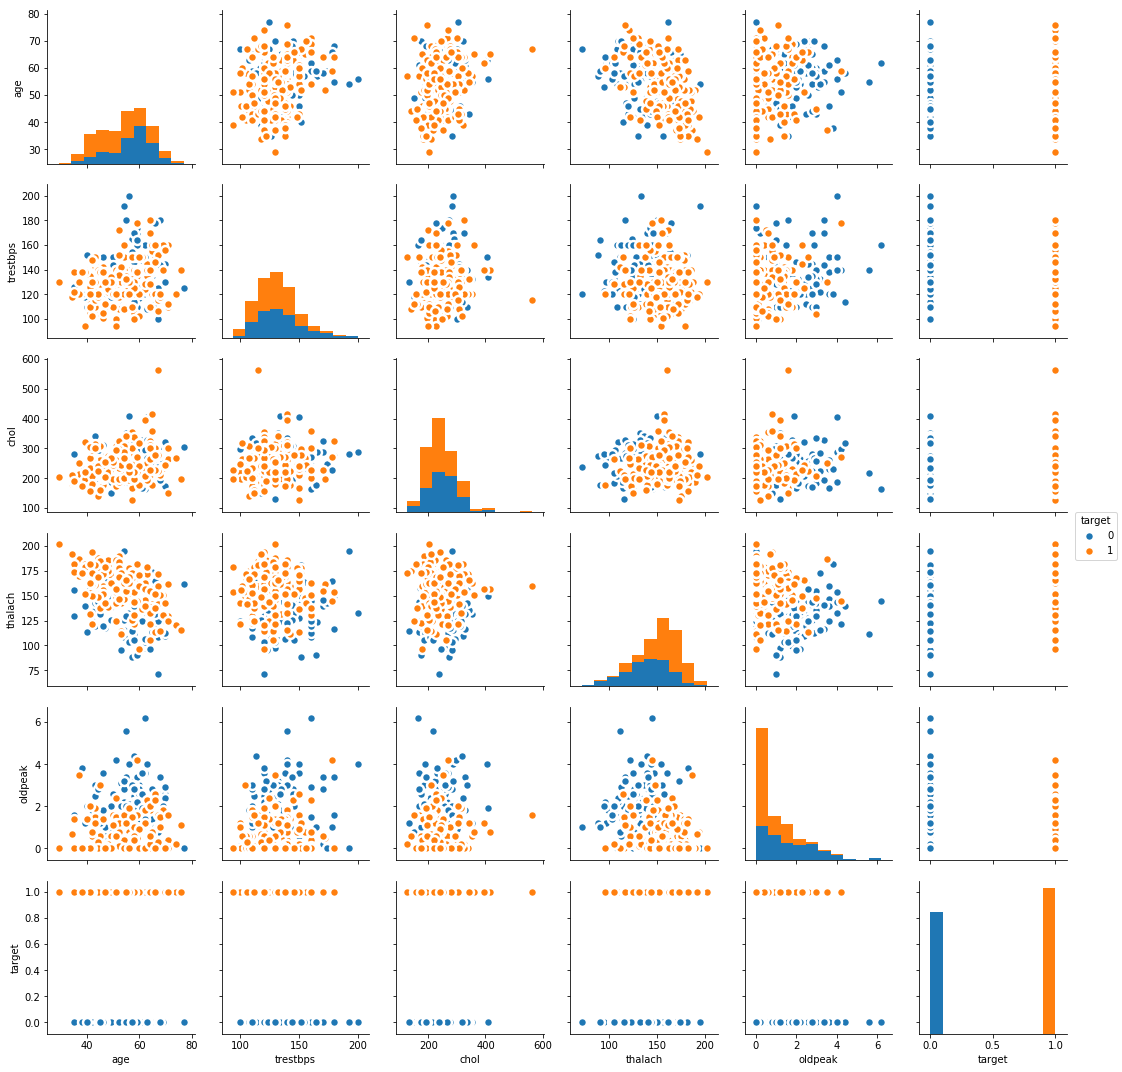

In [162]:
Data_cont_o = pd.concat([Data_cont, data['target']],axis=1)
sns.pairplot(Data_cont_o, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

# Data Cleaning

**Check if data has any missing values.**
As printed below, data includes no missing values, so we do not need to fill any missing values or to exclude any columns and rows.  

In [267]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Find duplicate rows in data.**
Below line of code, checks for duplicates if in a given row, all columns has exactly the same values.
Our data includes one duplicate row, which is dropped from the dataframe. 

In [268]:
duplicated_data = data.duplicated(subset=None, keep='first')
index_duplicate =[i for i, x in enumerate(duplicated_data) if x]
print(data.size)
clean_data = data.drop(index_duplicate)
print(clean_data.size)
clean_data.head()

4242
4228


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Check if data has any outliers.**
Note that in the below figure, the raw data is also superimposed on the boxplots with the use of jitter. In this context, jitter assures to separate the data so that they aren't plotted directly on top of each other. As an example, without superimposing data on boxplot with jitter, we may have decided that here are 6 possible outliers in that variable, instead of 9. Such biases can affect our decision on how to deal with outliers. A second advantage of jittering is that it allows us to visualize the type of distribution that may possibly be hidden otherwise.  

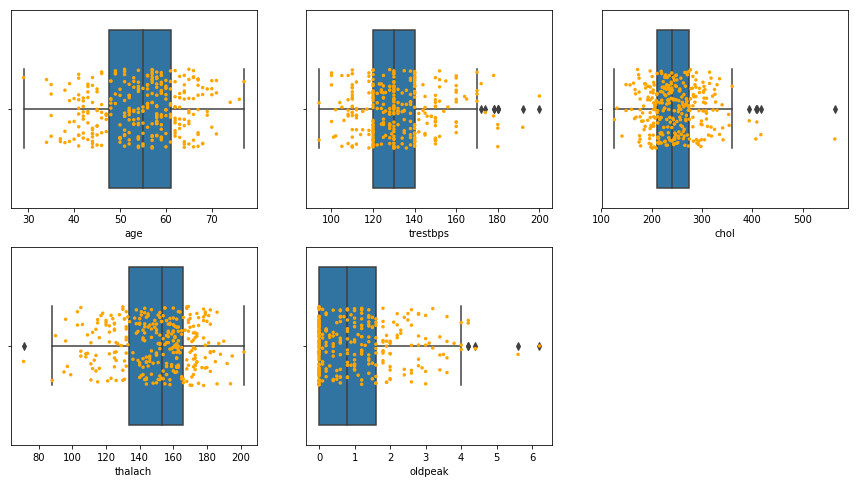

In [165]:
fig, axs = plt.subplots(nrows = 3, ncols=2, figsize = (15,8))

plot_number = 1
for i, x in enumerate(Data_cont):
    ax = plt.subplot(2, 3, plot_number)
    sns.boxplot(Data_cont[x]) 
    sns.stripplot(Data_cont[x], color="orange", jitter=0.2, size=3.5)
    plot_number=plot_number+1
plt.show()

**How to deal with outliers in the data?**
- Things to consider:
- Although, 3 of our continus variables show a number of outliers, these are univariate outliers, meaning they qualify as outliers only for one of the many variables that are used for the model. There are some available methods to identify multivariate outliers as well (i.e. using PCS to identify a cutoff for multivariate outliers).
- Second thing to consider is if these are real outiers. Our samle is composed on 302 unique datapoints and with more data, our distribution might be more close to a normal distribution. Moreover, even if an individual has extreme values, is it really their true measurement or perhaps a measurement error (i.e. for cholesterol variable, is it possible for a person to have a value above 500?)
- Lastly, does it make sense to exclude these outliers from the model estimation perspective. Removal of outliers can perhaps increase the models performance in training (dependent on model selected), but if we train a model without outliers, when thsi model will be used in predicting new coming data with outliers, the performance of our model might decrease. 

For now, although we will keep in mind the existance of these outliers, we wil decide what to do with these after model selection and testing. We may perhaps compare model performance with and without outliers in our dataset. 

**Creating a dataset without outliers**
<br> Here we will create a new data array without ouliers in 3 of our variables. We may compare model accuracy on data with and without outliers

In [14]:
clean_data_NoOut=clean_data
clean_data_NoOut["trestbps"] = np.where(clean_data["trestbps"] >170, clean_data.loc[clean_data['trestbps']<170, 'trestbps'].median(),clean_data['trestbps'])
clean_data_NoOut["chol"] = np.where(clean_data["chol"] >360, clean_data.loc[clean_data['chol']<360, 'chol'].median(),clean_data['chol'])
clean_data_NoOut["oldpeak"] = np.where(clean_data["oldpeak"] >4, clean_data.loc[clean_data['oldpeak']<4, 'oldpeak'].median(),clean_data['oldpeak'])

# STEP2: Data Modeling

# Decision Tree

**Import necessary libraries** 

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import export_graphviz 
from sklearn.model_selection import GridSearchCV

**Splitting data**

In [52]:
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach','exang', 'oldpeak','slope', 'ca', 'thal']
X = clean_data[feature_cols]
y = clean_data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

**Performing a grid search on parameters to find best parameter options**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
parameters = {'max_depth':[3,5, 7,10,None], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10], 'criterion':['gini', 'entropy']}
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best Params', grid_search.best_params_)
print("Best Score", grid_search.best_score_)
prediction = grid_search.best_estimator_.predict(X_test)


print('Accuracy Score', metrics.accuracy_score(y_test, prediction))
print('Classification  Report', metrics.classification_report(y_test, prediction))
print('ROC AUC', metrics.roc_auc_score(y_test, prediction))

Best Params {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7}
Best Score 0.8884209563746783
Accuracy Score 0.7362637362637363
Classification  Report              precision    recall  f1-score   support

          0       0.68      0.68      0.68        38
          1       0.77      0.77      0.77        53

avg / total       0.74      0.74      0.74        91

ROC AUC 0.7288977159880834


**Print summary statistics form the Model with best parameters**

TP: True positive, TN: True negative, FP: False positive, FN: False negative    
    
Classification Rate/Accuracy:
Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision: Precsion tells us about when it predicts yes, how often is it correct.
Precision = TP / (TP + FP)

Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes. Also known as sensitivity, or True Positive Rate
Recall=TP / (TP + FN)

F-measure:
Fmeasure=(2*Recall*Precision)/(Recall+Presision)

In [98]:
clf=DecisionTreeClassifier(criterion = "gini", max_depth=3, random_state = 100, min_samples_leaf = 7)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("precision score : "+str(metrics.precision_score(y_test, y_pred))) # tp/tp+fp
print("recall score : "+str(metrics.recall_score(y_test,y_pred)))   # tp/tp+fn
print("f1 score : "+str(metrics.f1_score(y_test,y_pred))) 

Accuracy: 0.7362637362637363
precision score : 0.7735849056603774
accuracy score : 0.7362637362637363
recall score : 0.7735849056603774
f1 score : 0.7735849056603775


**Plot confusion matrix**
<br>
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

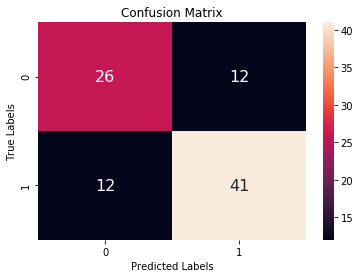

array([[26, 12],
       [12, 41]])

In [103]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

sns.heatmap(confusion_matrix,annot=True,annot_kws={"size":16})
plt.title('Confusion Matrix'); 
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
confusion_matrix

(-1, 13)

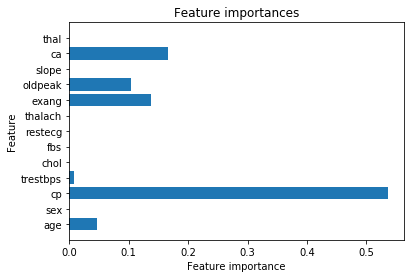

In [140]:
n_features = X.shape[1]
plt.barh(np.arange(n_features), clf.feature_importances_, align='center')
plt.title('Feature importances'); 
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

**Plot decision tree** 

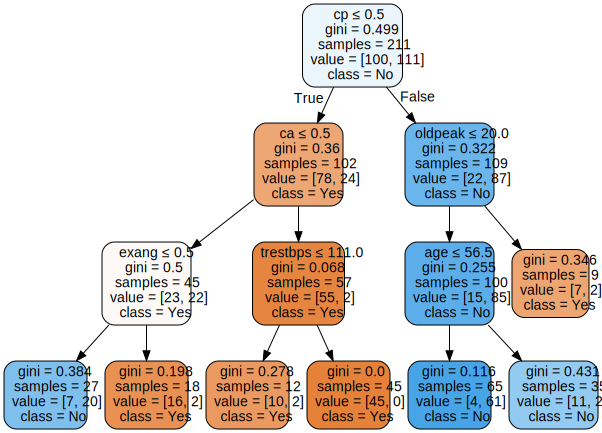

In [73]:
import graphviz
targ_names = ['Yes','No']
data = export_graphviz(clf,out_file=None,feature_names=X_train.columns,class_names=targ_names,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

**Supplementary Analysis 1**
<br>
**Running the model with data in which outliers excluded**
As you can see below, excluding outliers does not improve the model performance

In [124]:
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach','exang', 'oldpeak','slope', 'ca', 'thal']
X = clean_data_NoOut[feature_cols]
y = clean_data_NoOut.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
parameters = {'max_depth':[3,5, 7,10,None], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10], 'criterion':['gini', 'entropy']}
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best Params', grid_search.best_params_)
print("Best Score", grid_search.best_score_)
prediction = grid_search.best_estimator_.predict(X_test)


print('Accuracy Score', metrics.accuracy_score(y_test, prediction))
print('Classification  Report', metrics.classification_report(y_test, prediction))
print('ROC AUC', metrics.roc_auc_score(y_test, prediction))

Best Params {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6}
Best Score 0.8835302405834884
Accuracy Score 0.7362637362637363
Classification  Report              precision    recall  f1-score   support

          0       0.68      0.68      0.68        38
          1       0.77      0.77      0.77        53

avg / total       0.74      0.74      0.74        91

ROC AUC 0.7288977159880834


**Supplementary Analysis 2**
<br>
**Running the model only including important features**
As you can see below, excluding the features with less importance
does not improve the model performance, contrary it decreases the accuracy of model predictions

In [175]:
clean_data_ImpFeat=clean_data
clean_data_ImpFeat.drop(['sex', 'chol', 'fbs','restecg', 'thalach','slope', 'thal'], axis=1, inplace=True)
clean_data_ImpFeat.head()

,age,cp,trestbps,exang,oldpeak,ca,target
0,63,3,145,0,2.3,0,1
1,37,2,130,0,3.5,0,1
2,41,1,130,0,1.4,0,1
3,56,1,120,0,0.8,0,1
4,57,0,120,1,0.6,0,1


In [176]:
feature_cols = ['age', 'cp', 'trestbps','exang', 'oldpeak', 'ca']
X = clean_data_ImpFeat[feature_cols]
y = clean_data_ImpFeat.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
parameters = {'max_depth':[3,5, 7,10,None], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10], 'criterion':['gini', 'entropy']}
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best Params', grid_search.best_params_)
print("Best Score", grid_search.best_score_)
prediction = grid_search.best_estimator_.predict(X_test)

print('Accuracy Score', metrics.accuracy_score(y_test, prediction))
print('Classification  Report', metrics.classification_report(y_test, prediction))
print('ROC AUC', metrics.roc_auc_score(y_test, prediction))

Best Params {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4}
Best Score 0.8758372953382711
Accuracy Score 0.7142857142857143
Classification  Report              precision    recall  f1-score   support

          0       0.62      0.84      0.71        38
          1       0.85      0.62      0.72        53

avg / total       0.75      0.71      0.71        91

ROC AUC 0.7323733862959285


# k-Nearest Neighboor

In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [196]:
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach','exang', 'oldpeak','slope', 'ca', 'thal']
X = clean_data[feature_cols]
y = clean_data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [197]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

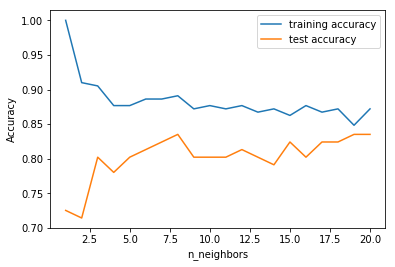

In [198]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

As k = 11 yields minimum difference between training and test datasets, so we are going to use k=11 for predicting target field.

In [199]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [200]:
accuracy_KNN = clf.score(X_test, y_test)

cm = confusion_matrix(y_test, pred)
print('Accuracy kNN : ' + str(accuracy_KNN))
print('True Negative : ' + str(cm[0][0]))
print('False Positive : ' + str(cm[0][1]))
print('False Neagtive  : ' + str(cm[1][0]))
print('True Positive : ' + str(cm[1][1]))

Accuracy kNN : 0.8351648351648352
True Negative : 29
False Positive : 9
False Neagtive  : 9
True Positive : 44


In [201]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.76      0.76      0.76        38
          1       0.83      0.83      0.83        53

avg / total       0.80      0.80      0.80        91



**Supplementary Analysis**
<br>
**Running the model after normalizing the data**
As you can see below, normalizing data did not improve model predictions, contrar there was a decrease in accuracy

In [296]:
def normalise(newdataf,dataf):
    normalizeddataf=newdataf.copy()
    for key in newdataf:
        dif=newdataf[key]-min(dataf[key])
        diff2=(dataf[key].max())-(dataf[key].min())
        return(normalizeddataf)

clean_data_norm = normalise(clean_data,clean_data)

In [297]:
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach','exang', 'oldpeak','slope', 'ca', 'thal']
X = clean_data_norm[feature_cols]
y = clean_data_norm.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_KNN = clf.score(X_test, y_test)

cm = confusion_matrix(y_test, pred)
print('Accuracy kNN : ' + str(accuracy_KNN))
print('True Negative : ' + str(cm[0][0]))
print('False Positive : ' + str(cm[0][1]))
print('False Neagtive  : ' + str(cm[1][0]))
print('True Positive : ' + str(cm[1][1]))

Accuracy kNN : 0.7802197802197802
True Negative : 28
False Positive : 10
False Neagtive  : 10
True Positive : 43
